
# Project: Soccer Database(The Ultimate Soccer database for data analysis and machine learning)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contain seven tables describing the number of matches, number of player, number of countries, players and team attributes, betting odds and match detailed from the 2008 to 2016 seasons. the tables are arranged as follows:
  > - +25,000 matches
  > - +10,000 players
  > - 11 European Countries with their lead championship
  > - Seasons 2008 to 2016
  > - Players and Teams sourced from Sports FIFA video games series, including the weekly updates
  > - Teams line up with squad formation (X, Y corrdinates)
  > - Betting odds fform up to 10 provides
  > - Detailed match events(goal types, possesion, corner, fouls, cards etc..) for +10,000 matches.

>For the purpose of this analysis I will not be using all the attribute of the tables, only the attributes that are specific to the analysis will be considered

> List of tables in the Database
   >- Country
   >- League
   >- Match
   >- Player
   >- Player_Attributes
   >- Team
   >- Team_Attributes
 
 ### Questions for the analysis
   - Which club scored the most home and away goals
   - Which Club has the most Average goals scored both home and away
   - Which player has the highest overall rating

#### Import necessary libraries and inspect data

In [1]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### General Properties
> Because the dataset was store in the SQlite database. I will be importing the sqlite3 module: A lightweight database management system bulit into Python for reading and writing to databases.

In [2]:
# import the SQlite library
import sqlite3

# creating a connection to the database
conn = sqlite3.connect("database.sqlite")


# loading the first table into a dataframe
df_country = pd.read_sql_query("select * from Country",conn)

In [3]:
# take a look at the first three rows of the table
df_country.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [4]:
# check for null values in the table
df_country.isna().sum()

id      0
name    0
dtype: int64

In [5]:
# check the general information about the table (number of rows and datatypes)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [6]:
# Check for duplicate values in the table
df_country.duplicated().sum()

0

In [7]:
# load in the second table
df_league = pd.read_sql_query("select * from League",conn)

In [8]:
# view the first five rows of the table 
df_league.tail()

,id,country_id,name
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA
10,24558,24558,Switzerland Super League


In [9]:
# check for null values in the table
df_league.isna().sum()

id            0
country_id    0
name          0
dtype: int64

In [10]:
# check the general information about the table (number of rows and datatypes)
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [11]:
# Check for duplicate values in the table
df_league.duplicated().sum()

0

In [12]:
# load in the third table
df_match = pd.read_sql_query("select * from Match", conn)

In [13]:
# view the first three rows of the table 
df_match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [14]:
# check for null values in the table 
# The match table has missing values
df_match.isna().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [15]:
# Check for duplicate values in the table
df_match.duplicated().sum()

0

In [16]:
# load in the fourth table
df_player = pd.read_sql_query("select * from Player", conn)

In [17]:
# view the first three rows of the table
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [18]:
# check for null values in the table
df_player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [19]:
# Check for duplicate values in the table
df_player.duplicated().sum()

0

In [20]:
# check the table's data types
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [21]:
# load in the fifth table
df_player_attributes = pd.read_sql_query("select * from Player_Attributes", conn)

# view the first three row of the table 
df_player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [22]:
# check for null values in the table 
# The player_attribute table has missing values
df_player_attributes.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [23]:
# Check for duplicate values in the table
df_player_attributes.duplicated().sum()

0

In [24]:
# Check the datatypes of the table
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [25]:
# load in the sixth table
df_team = pd.read_sql_query("select * from Team", conn)

# view the first three rows
df_team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [26]:
# check for null values in the table
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [27]:
# Check for duplicate values in the table
df_team.duplicated().sum()

0

In [28]:
# # load in the seventh table
df_team_attributes = pd.read_sql_query("select * from Team_Attributes",conn)

# view the first three rows
df_team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [29]:
# check null values in the dataset
# The team attributes table has null values
df_team_attributes.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

### Data Cleaning (All cleaning opeartions were performed here!)
> - Dealing with null values
> - Triming or reducing number of columns
> - Rename columns appropriately

In [30]:
# A quick look at the table
df_match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [31]:
# Dealing with missing values in the match table
# Lets select few columns to work with
row_columns = ["id","country_id", "league_id", "season", "stage", "date", "match_api_id","home_team_api_id",
               "away_team_api_id", "home_team_goal", "away_team_goal"]

# Function for selecting the needed rows
def new_columns(dataframe, list_of_columns):
    """This function returns the total rows of a dataframe and selected columns passed into a list"""
    return dataframe.loc[:, row_columns]



# calling the function and passing in augments
# Lets check the first five rows to keep things short
new_df_match = new_columns(df_match, row_columns)
new_df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [32]:
# No null values in our selected colums
new_df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [33]:
# A quick look at the table
# Dealing with missing values in the player attribute table
df_player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [34]:
# Lets select few columns to work with
row_columns_players= ["id","player_fifa_api_id", "player_api_id", "date", "overall_rating", "potential", "preferred_foot", "gk_diving", "gk_reflexes"]

# Lets reuse our function for selecting the needed rows
def new_columns(dataframe, list_of_columns):
    """This function returns the total rows of a dataframe and selected columns passed into a list"""
    return dataframe.loc[:, row_columns_players]



# calling the function and passing in augments
# Lets check the first five rows to keep things short
new_df_player = new_columns(df_player_attributes, row_columns_players)
new_df_player.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,gk_diving,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,6.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,6.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,6.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,5.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,5.0,7.0


In [35]:
# There are null values in our selected columns
new_df_player.isna().sum()

id                      0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating        836
potential             836
preferred_foot        836
gk_diving             836
gk_reflexes           836
dtype: int64

In [36]:
# Lets fill null values with 0
new_df_player.fillna(0, inplace=True)

# lets recheck the columns
new_df_player.isna().sum()

id                    0
player_fifa_api_id    0
player_api_id         0
date                  0
overall_rating        0
potential             0
preferred_foot        0
gk_diving             0
gk_reflexes           0
dtype: int64

In [37]:
# Dealing with missing values in the team's table
# Since we have one column with null values, we can drop these values from the column
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [38]:
df_team.dropna(inplace=True)

In [39]:
# Check if missing values has been dropped
df_team.isna().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

In [40]:
# Aquick look at the first three rows
df_team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [41]:
# Dealing with missing values in the teams attributes table
# Since we have one column with null values, we can drop these values from the column
df_team_attributes.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [42]:
# Dealing with missing values in the team attribute table
# Lets select few columns to work with
row_columns_team= ["id", "team_fifa_api_id", "team_api_id", "date", "buildUpPlaySpeed", 
                   "buildUpPlaySpeedClass", "buildUpPlayDribbling", "buildUpPlayDribblingClass",
                   "buildUpPlayPassing", "buildUpPlayPassingClass"]

# Lets reuse our function for selecting the needed rows
def new_columns(dataframe, list_of_columns):
    """This function returns the total rows of a dataframe and selected columns passed into a list"""
    return dataframe.loc[:, row_columns_team]



# calling the function and passing in arguments
# Lets check the first five rows to keep things short
new_df_team_attribute = new_columns(df_team_attributes, row_columns_team)
new_df_team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed


In [43]:
new_df_team_attribute.isna().sum()

id                             0
team_fifa_api_id               0
team_api_id                    0
date                           0
buildUpPlaySpeed               0
buildUpPlaySpeedClass          0
buildUpPlayDribbling         969
buildUpPlayDribblingClass      0
buildUpPlayPassing             0
buildUpPlayPassingClass        0
dtype: int64

In [44]:
# Lets fill null values in the teams attribute table with 0
new_df_team_attribute.fillna(0, inplace=True)

In [45]:
# Check if null values has been filled
new_df_team_attribute.isna().sum()

id                           0
team_fifa_api_id             0
team_api_id                  0
date                         0
buildUpPlaySpeed             0
buildUpPlaySpeedClass        0
buildUpPlayDribbling         0
buildUpPlayDribblingClass    0
buildUpPlayPassing           0
buildUpPlayPassingClass      0
dtype: int64

## Merging tables 
> In this section we will combine our cleaned tables into parts first and later into a big table

In [46]:
# Merging tables into one big table
# Merging the country table and the league table
country_league = df_country.merge(df_league, on="id", how="left")
country_league.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [47]:
# Rename table columns
country_league = country_league.rename(columns={"name_x": "name", "name_y": "league_name"})
country_league.head()

,id,name,country_id,league_name
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [48]:
# Merging the match table and the player table
match_player = df_player.merge(new_df_match, on="id", how="left")
match_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [49]:
# Merging the match_player table and the player attribute table
match_player_attribute = match_player.merge(new_df_player, on="player_api_id", how = "left")

In [50]:
match_player_attribute.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id_x',
       'birthday', 'height', 'weight', 'country_id', 'league_id', 'season',
       'stage', 'date_x', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal', 'id_y',
       'player_fifa_api_id_y', 'date_y', 'overall_rating', 'potential',
       'preferred_foot', 'gk_diving', 'gk_reflexes'],
      dtype='object')

In [51]:
# Merging the team table and the team attribute table
team_attribute = df_team.merge(new_df_team_attribute, on="team_api_id", how="left")
team_attribute.shape

(1458, 14)

In [52]:
# Merging the match_player_attribute table and country_league table
country_league_player = match_player_attribute.merge(country_league, on="country_id", how="left")
country_league_player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,country_id,league_id,season,...,player_fifa_api_id_y,date_y,overall_rating,potential,preferred_foot,gk_diving,gk_reflexes,id,name,league_name
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,218353,2016-02-18 00:00:00,67.0,71.0,right,6.0,8.0,1,Belgium,Belgium Jupiler League
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,218353,2015-11-19 00:00:00,67.0,71.0,right,6.0,8.0,1,Belgium,Belgium Jupiler League
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,218353,2015-09-21 00:00:00,62.0,66.0,right,6.0,8.0,1,Belgium,Belgium Jupiler League
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,218353,2015-03-20 00:00:00,61.0,65.0,right,5.0,7.0,1,Belgium,Belgium Jupiler League
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,218353,2007-02-22 00:00:00,61.0,65.0,right,5.0,7.0,1,Belgium,Belgium Jupiler League


In [53]:
# Merging the country_league_player table and team_attribute table
big_table = country_league_player.merge(team_attribute, right_on="team_api_id", left_on="home_team_api_id")
big_table.head()

,id_x_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,country_id,league_id,season,...,team_short_name,id_y_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,GEN,485,673,2010-02-22 00:00:00,45,Balanced,0.0,Little,45,Mixed
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,GEN,486,673,2011-02-22 00:00:00,66,Balanced,0.0,Little,52,Mixed
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,GEN,487,673,2012-02-22 00:00:00,53,Balanced,0.0,Little,55,Mixed
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,GEN,488,673,2013-09-20 00:00:00,58,Balanced,0.0,Little,38,Mixed
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,1,2008/2009,...,GEN,489,673,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed


In [54]:
# lets remove the columns with "id" we will not be using them in our analysis
col_names = big_table.columns
id_columns = []

for i in col_names:
    if "id" in i:
        id_columns.append(i)
final_table = big_table.drop(columns= id_columns, axis=1)

In [55]:
final_table.head()

,player_name,birthday,height,weight,season,stage,date_x,home_team_goal,away_team_goal,date_y,...,league_name,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2008/2009,1,2008-08-17 00:00:00,1,1,2016-02-18 00:00:00,...,Belgium Jupiler League,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,0.0,Little,45,Mixed
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2008/2009,1,2008-08-17 00:00:00,1,1,2016-02-18 00:00:00,...,Belgium Jupiler League,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,0.0,Little,52,Mixed
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2008/2009,1,2008-08-17 00:00:00,1,1,2016-02-18 00:00:00,...,Belgium Jupiler League,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,0.0,Little,55,Mixed
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2008/2009,1,2008-08-17 00:00:00,1,1,2016-02-18 00:00:00,...,Belgium Jupiler League,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,0.0,Little,38,Mixed
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2008/2009,1,2008-08-17 00:00:00,1,1,2016-02-18 00:00:00,...,Belgium Jupiler League,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed


In [56]:
# lets see the shape of the final table
final_table.shape

(1054478, 26)

In [57]:
final_table.columns

Index(['player_name', 'birthday', 'height', 'weight', 'season', 'stage',
       'date_x', 'home_team_goal', 'away_team_goal', 'date_y',
       'overall_rating', 'potential', 'preferred_foot', 'gk_diving',
       'gk_reflexes', 'name', 'league_name', 'team_long_name',
       'team_short_name', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> Statistical relationships and visuals

The Histogram of both home and away goals does not follow normal distribution, the histograms appeared skewed to the right.

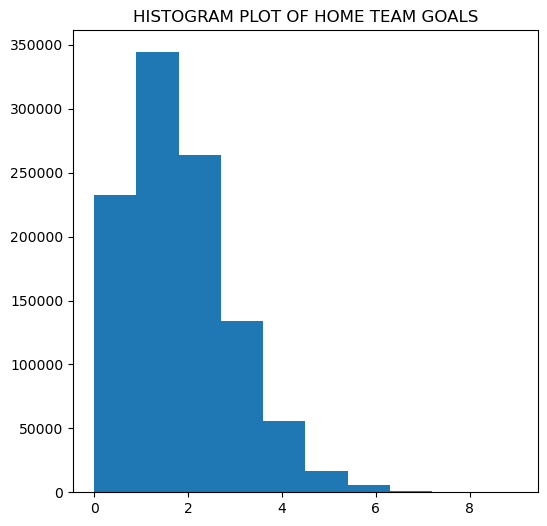

In [58]:
# Visuals
plt.title("Histogram plot of Home team goals".upper())
final_table.home_team_goal.hist(bins=10, figsize=(6,6), grid=False);

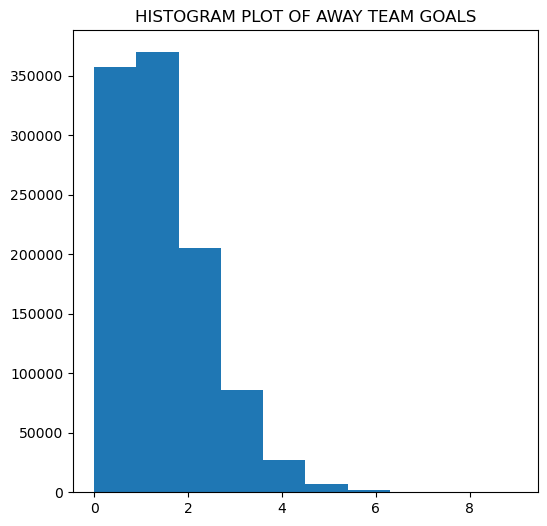

In [59]:
plt.title("Histogram plot of away team goals".upper())
final_table.away_team_goal.hist(bins=10, figsize=(6,6), grid=False);

>The correlation table shows various relationship between numeric columns in the dataset, the height and weight column have a strong positve correlation, while goalkeeper reflexes also have a strong postive correlation with goalkeeper diving.
lets explore further using seaborn's heatmap and scatter plot

In [60]:
final_table.corr()

,height,weight,stage,home_team_goal,away_team_goal,overall_rating,potential,gk_diving,gk_reflexes,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing
height,1.000000,0.763500,-0.015213,-0.004857,-0.025193,-0.005689,-0.029430,0.314606,0.310854,0.000213,-0.001075,-0.002111
weight,0.763500,1.000000,0.000442,-0.006583,-0.022636,0.050441,-0.009513,0.312029,0.311944,0.000412,-0.000830,-0.002174
stage,-0.015213,0.000442,1.000000,0.009075,-0.001074,0.008157,0.009468,-0.012224,-0.010525,0.006570,0.000759,0.007343
home_team_goal,-0.004857,-0.006583,0.009075,1.000000,-0.051702,0.005310,0.003417,-0.014422,-0.014978,0.010585,-0.001405,-0.077628
away_team_goal,-0.025193,-0.022636,-0.001074,-0.051702,1.000000,0.010086,0.009442,-0.017320,-0.015978,0.013239,-0.001801,0.043800
overall_rating,-0.005689,0.050441,0.008157,0.005310,0.010086,1.000000,0.841907,0.056063,0.040536,0.005476,-0.000950,0.010670
potential,-0.029430,-0.009513,0.009468,0.003417,0.009442,0.841907,1.000000,0.027560,0.042791,0.003592,-0.000331,0.010557
gk_diving,0.314606,0.312029,-0.012224,-0.014422,-0.017320,0.056063,0.027560,1.000000,0.935594,0.001758,0.000595,0.002195
gk_reflexes,0.310854,0.311944,-0.010525,-0.014978,-0.015978,0.040536,0.042791,0.935594,1.000000,0.002363,0.000652,-0.001738
buildUpPlaySpeed,0.000213,0.000412,0.006570,0.010585,0.013239,0.005476,0.003592,0.001758,0.002363,1.000000,-0.035392,0.246433


Correlation heatmap of various numeric column against each other: values close to +1 have positive correlation while values close to -1 have negative correlation

<AxesSubplot:title={'center':'CORRELATION HEATMAP OF DATASET'}>

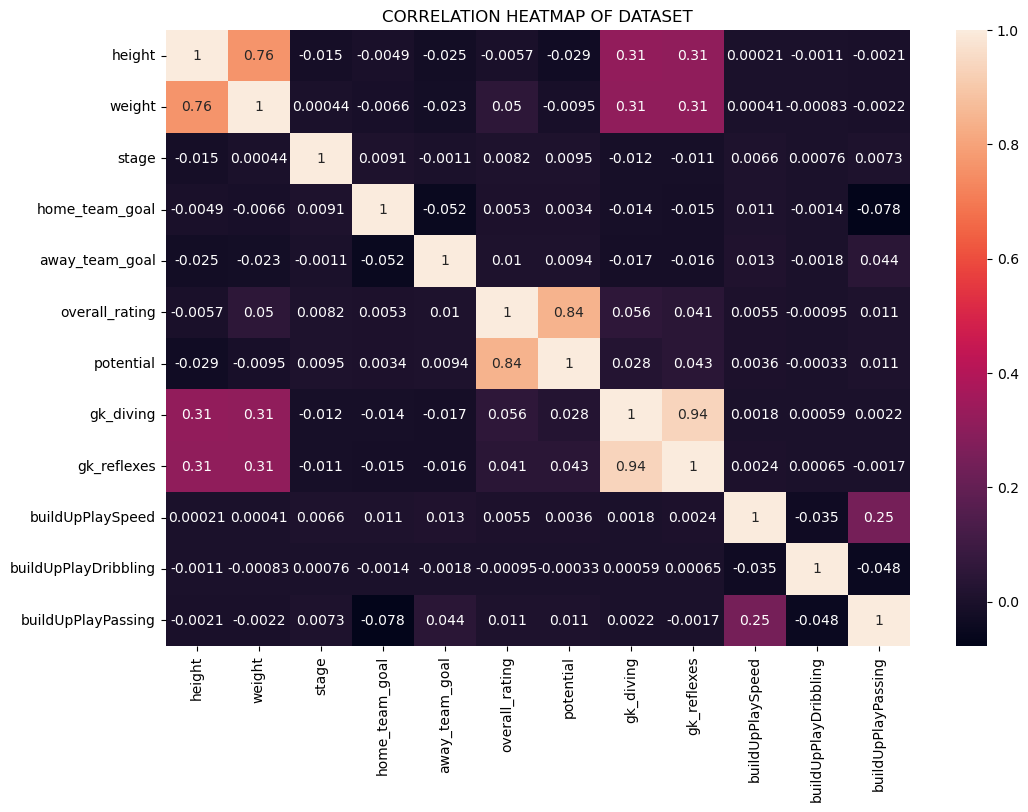

In [61]:
plt.figure(figsize=(12,8))
plt.title("correlation Heatmap of dataset".upper())
sns.heatmap(final_table.corr(),annot=True)

The scatter plot shows that height of players and weight of players is positively correlated

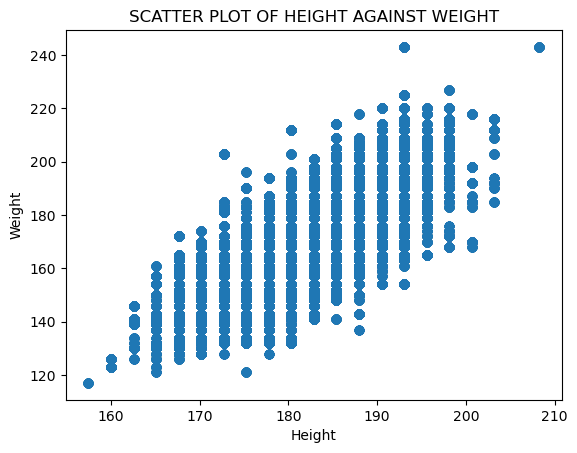

In [62]:
plt.title("scatter plot of height against weight".upper())
plt.ylabel("Weight")
plt.xlabel("Height")
plt.scatter(x=final_table.height, y=final_table.weight)


The  table below shows the basic statistics of the numeric columns including:
 - mean
 - standard deviation
 - 25th percentile or 1st quantile
 - 50th percentile or 2nd quantile
 - 75th percentile or 3rd quantile
 - maximum

In [63]:
final_table.describe()

,height,weight,stage,home_team_goal,away_team_goal,overall_rating,potential,gk_diving,gk_reflexes,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing
count,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06,1.054478e+06
mean,1.818942e+02,1.688435e+02,1.850111e+01,1.544767e+00,1.133227e+00,6.828464e+01,7.312217e+01,1.464781e+01,1.637020e+01,5.516806e+01,1.591823e+01,4.923583e+01
std,6.400010e+00,1.510351e+01,1.054865e+01,1.275909e+00,1.114526e+00,8.396264e+00,8.215485e+00,1.686545e+01,1.720319e+01,1.059204e+01,2.337070e+01,1.092582e+01
min,1.574800e+02,1.170000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,2.000000e+01
25%,1.778000e+02,1.590000e+02,9.000000e+00,1.000000e+00,0.000000e+00,6.400000e+01,6.900000e+01,7.000000e+00,8.000000e+00,4.800000e+01,0.000000e+00,4.100000e+01
50%,1.828800e+02,1.680000e+02,1.800000e+01,1.000000e+00,1.000000e+00,6.900000e+01,7.400000e+01,1.000000e+01,1.100000e+01,5.500000e+01,0.000000e+00,5.000000e+01
75%,1.854200e+02,1.790000e+02,2.700000e+01,2.000000e+00,2.000000e+00,7.300000e+01,7.800000e+01,1.300000e+01,1.500000e+01,6.400000e+01,4.000000e+01,5.500000e+01
max,2.082800e+02,2.430000e+02,3.800000e+01,9.000000e+00,9.000000e+00,9.400000e+01,9.700000e+01,9.400000e+01,9.600000e+01,7.800000e+01,7.700000e+01,8.000000e+01


### Research Question 1 (Which club scored the most home and away goals)
> Bayern Munich in the Germany Bundesliga scored the most home and away goals in the 2012/2013 season

In [64]:
final_table["Total_goals"] = final_table.home_team_goal + final_table.away_team_goal
max_goals = final_table.Total_goals.max()
max_goals

11

In [65]:
final_table.query(f"Total_goals == 11").loc[:,["team_long_name","season","league_name","Total_goals"]]

,team_long_name,season,league_name,Total_goals
746317,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746318,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746319,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746320,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746321,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
...,...,...,...,...
746468,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746469,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746470,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11
746471,FC Bayern Munich,2012/2013,Germany 1. Bundesliga,11


### Research Question 2(Which Club has the most Average goals scored both home and away)
> Limiting our result to the top 10, we can see the clubs that have most avarage goals

In [66]:
# Clubs with the most Average goals scored both home and away
avg_goals = round(final_table.Total_goals.mean())
avg_goals

3

In [67]:
teams_above_avg_goal = final_table.query("Total_goals >= 3")
teams_below_avg_goal = final_table.query("Total_goals < 3")

In [68]:
# clubs with most Average goals sorted with to the last 10
most_avg_goal = teams_above_avg_goal.groupby("team_long_name")["Total_goals"].nunique()
most_avg_goal_sorted = most_avg_goal.sort_values(ascending=False)[0:10]
most_avg_goal_sorted

team_long_name
Club Brugge KV         7
Arsenal                7
Everton                7
Olympique Lyonnais     7
Eintracht Frankfurt    7
Chelsea                7
SV Werder Bremen       7
Manchester United      7
Bayer 04 Leverkusen    7
Tottenham Hotspur      7
Name: Total_goals, dtype: int64

### Research Question 3  (Which player has the highest overall rating!)
> The result shows that lionel messi was the player with the higest overall rating

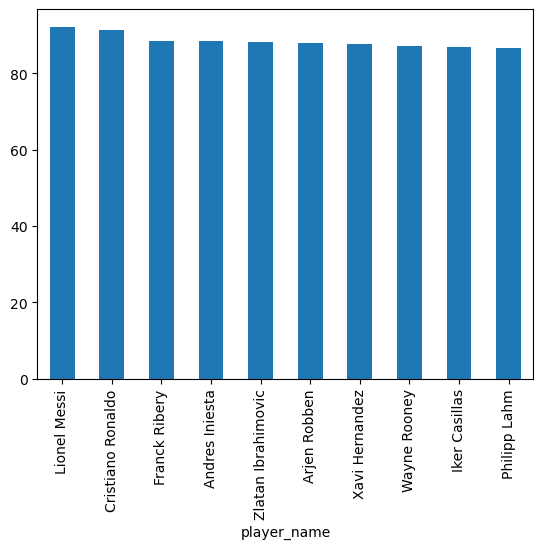

In [69]:
avg_overall_rating = final_table.groupby("player_name")["overall_rating"].mean()
avg_overall_rating.sort_values(ascending=False)[:10].plot(kind="bar");
#final_table.height.max()

<a id='conclusions'></a>
## Conclusions
> A complete data analysis process was carried out on the choosen dataset.
>The dataset contains seven tables which were appropriately cleaned. Some of the columns were dropped to make the analysis quick and concised. Various statistical summaries like histogram plot, correlation plot and scatter plot were plotted to show the relationship between different columns

>Three questions were answered to further gain insight into the data.

### Limitations
>  - Dropping some columns in the dataset do not give room for the dataset to be fully explored
>  - An analysis of variance will further give a robust analysis results

### *References*:
> 1. [https://www.kaggle.com/datasets/hugomathien/soccer]
> 2. [https://towardsdatascience.com/5-things-i-wish-the-pandas-library-could-do-e9017c127779]